<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/banner_etl.png" alt="Fifa_18" width="auto"> 

# 1. IMPORTAR LIBRERIAS.
-----------------------------

In [1]:
pip install --upgrade jupyter


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade ipykernel

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [6]:
import sqlalchemy
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick
%run ../functions/functions.ipynb import rango_edad 
%run ../functions/functions.ipynb import convertir_a_numeros
%run ../functions/functions.ipynb import talento
%run ../functions/functions.ipynb import convertir_valor


# 2. CARGAR ARCHIVOS.
-------------------------

In [7]:
Completo = pd.read_csv(os.path.abspath("../1_data/CompleteDataset.csv"))
Personal = pd.read_csv("../1_data/PlayerPersonalData.csv")
Atributos = pd.read_csv("../1_data/PlayerAttributeData.csv")
Posiciones = pd.read_csv("../1_data/PlayerPlayingPositionData.csv")

C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\283131726.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  Completo = pd.read_csv(os.path.abspath("../1_data/CompleteDataset.csv"))
C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\283131726.py:3: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  Atributos = pd.read_csv("../1_data/PlayerAttributeData.csv")


# 3. EXPLORAR LA DATA.
----------------------

<h3><em>3.1 DataFrame Completo</em></h3>
-------------------

In [8]:
Completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [9]:
Completo[:20]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [10]:
Completo.describe(include='all')

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981,17981.000000,17981,17981,17981,17981.000000,17981.000000,17733,17981,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
unique,NaN,16975,NaN,17929,165,165,NaN,NaN,647,679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,J. Williams,NaN,https://cdn.sofifa.org/48/18/players/212977.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Villarreal CF,https://cdn.sofifa.org/24/18/teams/483.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7,NaN,2,1630,1630,NaN,NaN,35,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8990.000000,NaN,25.144541,NaN,NaN,NaN,66.247984,71.190813,NaN,NaN,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,NaN,4.614272,NaN,NaN,NaN,6.987965,6.102199,NaN,NaN,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,46.000000,NaN,NaN,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,NaN,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,NaN,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,NaN,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000


In [11]:
# Análisis de duplicados
duplicados = Completo.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")


Número de filas duplicadas: 0


In [12]:
# Análisis de nulos
nulos = Completo.isna()
print(f"\nNúmero de datos nulos:{nulos.sum().sum()}")


Número de datos nulos:53002


<h3><em>3.2 DataFrame Personal</em></h3>
-------------------

In [13]:
Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  17981 non-null  int64 
 1   Unnamed: 0    17981 non-null  int64 
 2   ID            17981 non-null  int64 
 3   Name          17981 non-null  object
 4   Age           17981 non-null  int64 
 5   Photo         17981 non-null  object
 6   Nationality   17981 non-null  object
 7   Flag          17981 non-null  object
 8   Overall       17981 non-null  int64 
 9   Potential     17981 non-null  int64 
 10  Club          17733 non-null  object
 11  Club Logo     17981 non-null  object
 12  Value         17981 non-null  object
 13  Wage          17981 non-null  object
 14  Special       17981 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


In [14]:
Personal[:20]

,Unnamed: 0.1,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493
5,5,5,188545,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,€355K,2143
6,6,6,193080,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,€215K,1458
7,7,7,183277,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,€295K,2096
8,8,8,182521,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€79M,€340K,2165
9,9,9,167664,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,€275K,1961


In [15]:
Personal.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
count,17981.000000,17981.000000,17981.000000,17981,17981.000000,17981,17981,17981,17981.000000,17981.000000,17733,17981,17981,17981,17981.000000
unique,NaN,NaN,NaN,16975,NaN,17929,165,165,NaN,NaN,647,679,207,142,NaN
top,NaN,NaN,NaN,J. Williams,NaN,https://cdn.sofifa.org/48/18/players/212977.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Villarreal CF,https://cdn.sofifa.org/24/18/teams/483.png,€1.1M,€1K,NaN
freq,NaN,NaN,NaN,7,NaN,2,1630,1630,NaN,NaN,35,35,387,4201,NaN
mean,8990.000000,8990.000000,207658.710138,NaN,25.144541,NaN,NaN,NaN,66.247984,71.190813,NaN,NaN,NaN,NaN,1594.095100
std,5190.811931,5190.811931,32291.667313,NaN,4.614272,NaN,NaN,NaN,6.987965,6.102199,NaN,NaN,NaN,NaN,272.151435
min,0.000000,0.000000,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,46.000000,NaN,NaN,NaN,NaN,728.000000
25%,4495.000000,4495.000000,192622.000000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,NaN,NaN,NaN,1449.000000
50%,8990.000000,8990.000000,214057.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,NaN,NaN,NaN,1633.000000
75%,13485.000000,13485.000000,231448.000000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,NaN,NaN,NaN,1786.000000


In [16]:
# Análisis de duplicados
duplicados_personal = Personal.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados_personal.sum().sum()}")


Número de filas duplicadas: 0


In [17]:
# Análisis de nulos
nulos_personal = Personal.isna() # Correspondientes a aquellos jugadores sin club.
print(f"\nNúmero de datos nulos: {nulos_personal.sum().sum()}")


Número de datos nulos: 248


<h4>Inspeccionando los datos nulos:</h4>

In [18]:
Personal.isna().sum() # Corresponden a aquellos jugadores sin Club.

Unnamed: 0.1      0
Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
Nationality       0
Flag              0
Overall           0
Potential         0
Club            248
Club Logo         0
Value             0
Wage              0
Special           0
dtype: int64

<h3><em>3.3 DataFrame Atributos</em></h3>
-------------------

In [19]:
Atributos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          17981 non-null  int64 
 1   Acceleration        17981 non-null  object
 2   Aggression          17981 non-null  object
 3   Agility             17981 non-null  object
 4   Balance             17981 non-null  object
 5   Ball control        17981 non-null  object
 6   Composure           17981 non-null  object
 7   Crossing            17981 non-null  object
 8   Curve               17981 non-null  object
 9   Dribbling           17981 non-null  object
 10  Finishing           17981 non-null  object
 11  Free kick accuracy  17981 non-null  object
 12  GK diving           17981 non-null  object
 13  GK handling         17981 non-null  object
 14  GK kicking          17981 non-null  object
 15  GK positioning      17981 non-null  object
 16  GK reflexes         17

In [20]:
Atributos[:20]

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,5,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,6,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,7,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,8,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,9,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


In [21]:
Atributos.describe(include='all')

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981,17981,17981,17981,17981,17981,17981,17981,17981,...,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981
unique,NaN,161,151,146,135,184,161,176,153,194,...,158,209,153,169,194,180,187,168,173,125
top,NaN,68,70,72,68,64,60,62,45,65,...,64,64,68,62,68,72,66,72,58,48
freq,NaN,706,495,605,609,739,708,527,395,694,...,849,807,556,504,759,624,559,627,537,413
mean,8990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5190.811931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4495.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13485.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Análisis de duplicados
duplicados_atributos = Atributos.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados_atributos.sum().sum()}")


Número de filas duplicadas: 0


In [23]:
# Análisis de nulos
nulos_atributos = Atributos.isna() 
print(f"\nNúmero de datos nulos: {nulos_atributos.sum().sum()}")


Número de datos nulos: 0


<h3><em>3.4 DataFrame Posiciones</em></h3>
-------------------

In [24]:
Posiciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   CAM                  15952 non-null  float64
 2   CB                   15952 non-null  float64
 3   CDM                  15952 non-null  float64
 4   CF                   15952 non-null  float64
 5   CM                   15952 non-null  float64
 6   ID                   17981 non-null  int64  
 7   LAM                  15952 non-null  float64
 8   LB                   15952 non-null  float64
 9   LCB                  15952 non-null  float64
 10  LCM                  15952 non-null  float64
 11  LDM                  15952 non-null  float64
 12  LF                   15952 non-null  float64
 13  LM                   15952 non-null  float64
 14  LS                   15952 non-null  float64
 15  LW                   15952 non-null 

In [25]:
Posiciones[0:20]

,Unnamed: 0,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,NaN,NaN,NaN,NaN,NaN,193080,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,88.0,47.0,61.0,87.0,81.0,183277,88.0,59.0,47.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,83.0,72.0,82.0,81.0,87.0,182521,83.0,76.0,72.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,81.0,46.0,52.0,84.0,71.0,167664,81.0,51.0,46.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [26]:
Posiciones.describe(include='all')

,Unnamed: 0,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8990.000000,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,59.251755,56.979689,55.550464,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,9.880164,9.791627,12.192579,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,27.000000,30.000000,25.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,53.000000,50.000000,45.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,60.000000,58.000000,57.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,66.000000,64.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000


In [27]:
# Análisis de duplicados
duplicados_posiciones = Posiciones.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados_posiciones.sum().sum()}")


Número de filas duplicadas: 0


In [28]:
# Análisis de nulos
nulos_posiciones = Posiciones.isna()
print(f"\nNúmero de datos nulos: {nulos_posiciones.sum().sum()}")


Número de datos nulos: 52754


<h4>Inspeccionando los datos nulos:</h4>

In [29]:
filas_con_na = Posiciones[Posiciones.isna().any(axis=1)] # Devuelve 2029 filas que contienen almenos un dato nulo.
coincidencias = filas_con_na.dropna(axis=1, how='any')
valores_comunes = {col: filas_con_na[col].unique() for col in coincidencias.columns}
valores_comunes #  Encontramos que en el resultado para el metodo unique(), el unico valor que no se repite es "GK" para la columna "Preferred Positions"

{'Unnamed: 0': array([    4,     6,    12, ..., 17951, 17976, 17977]),
 'ID': array([167495, 193080, 192119, ..., 221669, 237463,  11728]),
 'Preferred Positions': array(['GK '], dtype=object)}

<hr style="border-top: 1px dashed white; border-bottom: 0px">

<h3><em>Conclusiones de la exploración:</em></h3>
<li>El archivo CompleteDataset ("Completo") consiste en una tabla formato .csv que posee información sobre los jugadores de futbol que componen el juego FIFA. Posee información de 17.981 jugadores (filas) distribuída en 75 columnas.</li>
<li>La data mencionada anteriormente se encuentra dividida en 3 subarchivos</li>
       
        - PlayerPersonalData ("Personal"): incluye información personal de los jugadores distribuida en 15 columnas.
        - PlayerAttributeData ("Atributos"): incluye valores numéricos que refieren al puntaje de los jugadores asociados a una habilidad específica distribuida en 36 columnas.
        - PlayerPlayingPositionData ("Posiciones"): incluye valores numéricos que refieren al rendimiento de los jugadores en las distintas posiciones de la cancha distribuida en 29 columnas.
<li>El archivo Completo posee un total de 53.002 valores nulos, de los cuales:</li>
        
        - El dataset Personal posee 248 nulos correspondientes a jugadores sin un club asociado.
        - El dataset Atributos no posee valores nulos.
        - El dataset Posiciones posee 52754 valores nulos asociados al rendimiento de los jugadores arquero (Preferred Positions=GK) en las distintas posiciones. A su vez, dicho archivo no posee la columna GK asociada al rendimiento de los jugadores en dicha posición (se decidió trabajar un dataset alternativo para estos jugadores).
        

<hr style="border-top: 1px dashed white; border-bottom: 0px">

rows × 75 columns

# 4.TRANSFORMAR LA DATA.
<hr>

<h3><em><b>4.1 Análisis de atributos de jugadores sudamericanos.</b></em></h3>
-------------------

<img src="https://github.com/faq998/Im-genes/blob/main/Paises%20sudamericanos.jpg?raw=true" alt="Mejor inversión por jugador" width="1000px" style="border-radius: 30px;">

In [30]:
# Se dividen los principales atributos de jugadores de campo respecto a los arqueros para realizar el análisis
Columnas_atributos=['Acceleration', 'Agility', 'Ball control', 'Dribbling', 'Finishing', 'Free kick accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Standing tackle', 'Strength'] 
Columnas_atributos_arqueros=['GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']

In [31]:
for columna in Columnas_atributos:
    Completo[columna] = pd.to_numeric(Completo[columna].astype(str).str.replace('+', ''), errors='coerce').fillna(0).astype(int)
for columna in Columnas_atributos_arqueros:
     Completo[columna] = pd.to_numeric(Completo[columna].astype(str).str.replace('+', ''), errors='coerce').fillna(0).astype(int)

In [32]:
# Transformo los valores asociados a los atributos de los jugadores de tipo str a int
for columna in Columnas_atributos:
    Completo[columna]=Completo[columna].astype(int)
for columna in Columnas_atributos_arqueros:
    Completo[columna]=Completo[columna].astype(int)

In [33]:
# Se divide el df "CompleteDataset" en 2: uno que incluye a los jugadores de campo y otro que incluye a los arqueros
Completo['Preferred Positions'] = Completo['Preferred Positions'].str.strip() # Elimino espacios en blanco de columna 'Preferred Positions'
Completo_arqueros=Completo[Completo['Preferred Positions'] == 'GK']
Completo_campo = Completo[~Completo['Name'].isin(Completo_arqueros['Name'])]

In [34]:
Completo_arqueros.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,T. Courtois,25,https://cdn.sofifa.org/48/18/players/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,J. Oblak,24,https://cdn.sofifa.org/48/18/players/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,93,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,29,H. Lloris,30,https://cdn.sofifa.org/48/18/players/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,S. Handanovič,32,https://cdn.sofifa.org/48/18/players/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,87,87,Inter,https://cdn.sofifa.org/24/18/teams/44.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,P. Čech,35,https://cdn.sofifa.org/48/18/players/48940.png,Czech Republic,https://cdn.sofifa.org/flags/12.png,86,86,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,74,K. Navas,30,https://cdn.sofifa.org/48/18/players/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,85,85,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,76,D. Subašić,32,https://cdn.sofifa.org/48/18/players/192593.png,Croatia,https://cdn.sofifa.org/flags/10.png,85,85,AS Monaco,https://cdn.sofifa.org/24/18/teams/69.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Se filtran del df completo los jugadores de las principales potencias sudamericanas
# JUGADORES DE CAMPO
Camp_Arg=Completo_campo[Completo_campo['Nationality'] == 'Argentina']
Camp_Bra=Completo_campo[Completo_campo['Nationality'] == 'Brazil']
Camp_Uru=Completo_campo[Completo_campo['Nationality'] == 'Uruguay']
Camp_Col=Completo_campo[Completo_campo['Nationality'] == 'Colombia']

# ARQUEROS
Arq_Arg=Completo_arqueros[Completo_arqueros['Nationality'] == 'Argentina']
Arq_Bra=Completo_arqueros[Completo_arqueros['Nationality'] == 'Brazil']
Arq_Uru=Completo_arqueros[Completo_arqueros['Nationality'] == 'Uruguay']
Arq_Col=Completo_arqueros[Completo_arqueros['Nationality'] == 'Colombia']

In [36]:
# Creo gráfica comparativa con los atributos promedio de los jugadores sudamericanos por pais de origen
# JUGADORES DE CAMPO
Prom_Camp_Arg=Camp_Arg[Columnas_atributos].mean()
Prom_Camp_Bra=Camp_Bra[Columnas_atributos].mean()
Prom_Camp_Uru=Camp_Uru[Columnas_atributos].mean()
Prom_Camp_Col=Camp_Col[Columnas_atributos].mean()

# ARQUEROS
Prom_Arq_Arg=Arq_Arg[Columnas_atributos_arqueros].mean()
Prom_Arq_Bra=Arq_Bra[Columnas_atributos_arqueros].mean()
Prom_Arq_Uru=Arq_Uru[Columnas_atributos_arqueros].mean()
Prom_Arq_Col=Arq_Col[Columnas_atributos_arqueros].mean()

# Combino info en un solo df (exportar)
comparativa_campo = pd.DataFrame({
    'ARGENTINA': Prom_Camp_Arg,
    'BRAZIL': Prom_Camp_Bra,
    'URUGUAY': Prom_Camp_Uru,
    'COLOMBIA': Prom_Camp_Col,
})

comparativa_arqueros = pd.DataFrame({
    'ARGENTINA': Prom_Arq_Arg,
    'BRAZIL': Prom_Arq_Bra,
    'URUGUAY': Prom_Arq_Uru,
    'COLOMBIA': Prom_Arq_Col,
})

<h3>Exportar como csv:</h3>

In [37]:
comparativa_campo.to_csv("../1.1_data_limpia/Atributos/comparativa_campo.csv", sep=",")
comparativa_arqueros.to_csv("../1.1_data_limpia/Atributos/comparativa_arqueros.csv", sep=",")

<h3><em>4.1.1 Analisis de atributos mejores delanteros del juego.</em></h3>
-------------------

<img src="https://github.com/faq998/Im-genes/blob/main/Atributos%20Messi.jpg?raw=true" alt="Mejor inversión por jugador" width="auto">

In [38]:
# Definimos los atributos a comparar de los jugadores cuya posición favorita es delantero
Comparativa_atributos_delanteros= Completo_campo[
    (Completo_campo["Preferred Positions"] == "SS") |
    (Completo_campo["Preferred Positions"] == "RW") |
    (Completo_campo["Preferred Positions"] == "LW") |
    (Completo_campo["Preferred Positions"] == "CF") |
    (Completo_campo["Preferred Positions"] == "ST") |
    (Completo_campo["Preferred Positions"] == "ST") |
    (Completo_campo["Preferred Positions"] == "ST LW") |
    (Completo_campo["Preferred Positions"] == "FCF")
][["Name", 'Dribbling', 'Finishing', 'Shot power', 'Sprint speed']].head(5)




<h3>Exportar como csv:</h3>

In [39]:
Comparativa_atributos_delanteros.to_csv("../1.1_data_limpia/Atributos/Comparativa_atributos_delanteros.csv", index=False)

<h3><em>4.1.2 Análisis de atributos mejores mediocampistas del juego.</em></h3>
-------------------

<img src="https://github.com/faq998/Im-genes/blob/main/Atributos%20DeBruyne.jpg?raw=true" alt="Mejor inversión por jugador" width="auto">

In [40]:
#Para estos jugadores incluimos los atributos que nos interesa comparar

Comparativa_atributos_mediocampistas= Completo_campo[
    (Completo_campo["Preferred Positions"] == "CDM CM") |
    (Completo_campo["Preferred Positions"] == "CDM ") |
    (Completo_campo["Preferred Positions"] == "RM CM CAM") |
    (Completo_campo["Preferred Positions"] == "RM") |
    (Completo_campo["Preferred Positions"] == "CDM CAM CM") 
][["Name", 'Balance','Strength', 'Ball control', 'Sprint speed', 'Long passing', 'Short passing']].head(5)



<h3>Exportar como csv:</h3>

In [41]:
Comparativa_atributos_mediocampistas.to_csv("../1.1_data_limpia/Atributos/Comparativa_atributos_mediocampistas.csv", index=False)

<h3><em>4.1.3 Análisis de atributos mejores defensores del juego.</em></h3>
-------------------

<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/defensor_atr.jpg" alt="Mejor inversión por jugador" width="auto">

In [42]:
#Para estos jugadores incluimos los atributos que nos interesa comparar

Comparativa_atributos_defensores= Completo_campo[
    (Completo_campo["Preferred Positions"] == "LIB") |
    (Completo_campo["Preferred Positions"] == "CB") |
    (Completo_campo["Preferred Positions"] == "RB") |
    (Completo_campo["Preferred Positions"] == "LB") |
    (Completo_campo["Preferred Positions"] == "RWB") |
    (Completo_campo["Preferred Positions"] == "LWB") |
    (Completo_campo["Preferred Positions"] == "SW") 
][["Name", 'Strength', 'Interceptions', 'Jumping','Sliding tackle', 'Sprint speed']].head(5)

<h3>Exportar como csv:</h3>

In [43]:
Comparativa_atributos_defensores.to_csv("../1.1_data_limpia/Atributos/Comparativa_atributos_defensores.csv", index=False)

<h3><em>4.1.4 Análisis de atributos mejores arqueros del juego.</em></h3>
-------------------

<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/arquero_atr.png" alt="Mejor inversión por jugador" width="1700px">

In [44]:
#Para estos jugadores incluimos los atributos que nos interesa comparar

Comparativa_atributos_arqueros= Completo_arqueros[["Name", 'GK diving', 'GK handling', 'GK kicking', 'GK positioning','GK reflexes']].head(5)

<h3>Exportar como csv:</h3>

In [45]:
Comparativa_atributos_arqueros.to_csv("../1.1_data_limpia/Atributos/Comparativa_atributos_arqueros.csv", index=False)

<h3><em>4.1.5 Análisis mediante regresión entre precio del mercado y atributos.</em></h3>
-------------------

##### Se busca encontrar una relación entre el valor de mercado de los jugadores y el puntaje que poseen en sus distrintos atributos, y de esta manera interpretar los atributos más valorados por el mercado.

<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/NegociacionLukaku.webp" alt="Mejor inversión por jugador" width="700px">
<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/PresentacionLukaku.webp" alt="Mejor inversión por jugador" width="700px">

In [46]:
# Se eligen los atributos del juego a analizar
Regresion=Completo[['Name','Value','Agility','Dribbling','Finishing','Shot power','Sprint speed','Interceptions','Marking']]

In [47]:
Regresion

,Name,Value,Agility,Dribbling,Finishing,Shot power,Sprint speed,Interceptions,Marking
0,Cristiano Ronaldo,€95.5M,89,91,94,94,91,29,22
1,L. Messi,€105M,90,97,95,85,87,22,13
2,Neymar,€123M,96,96,89,80,90,36,21
3,L. Suárez,€97M,86,86,94,87,77,41,30
4,M. Neuer,€61M,52,30,13,25,61,30,10
...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,€50K,38,12,5,19,32,9,9
17977,B. Richardson,€0,35,11,11,13,25,16,14
17978,J. Young,€60K,60,37,47,42,51,16,18
17979,J. Lundstram,€60K,58,41,32,43,58,46,43


In [48]:
# Aplicar la función para convertir valores de mercado a números
Regresion['Value'] = Regresion['Value'].apply(convertir_a_numeros)


C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\80961478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regresion['Value'] = Regresion['Value'].apply(convertir_a_numeros)


In [49]:
Regresion

,Name,Value,Agility,Dribbling,Finishing,Shot power,Sprint speed,Interceptions,Marking
0,Cristiano Ronaldo,95.50,89,91,94,94,91,29,22
1,L. Messi,105.00,90,97,95,85,87,22,13
2,Neymar,123.00,96,96,89,80,90,36,21
3,L. Suárez,97.00,86,86,94,87,77,41,30
4,M. Neuer,61.00,52,30,13,25,61,30,10
...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,0.05,38,12,5,19,32,9,9
17977,B. Richardson,0.00,35,11,11,13,25,16,14
17978,J. Young,0.06,60,37,47,42,51,16,18
17979,J. Lundstram,0.06,58,41,32,43,58,46,43


In [50]:
Regresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           17981 non-null  object 
 1   Value          17981 non-null  float64
 2   Agility        17981 non-null  int64  
 3   Dribbling      17981 non-null  int64  
 4   Finishing      17981 non-null  int64  
 5   Shot power     17981 non-null  int64  
 6   Sprint speed   17981 non-null  int64  
 7   Interceptions  17981 non-null  int64  
 8   Marking        17981 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ MB


In [51]:
# Filtramos eliminando valores atipicos previo a realizar el análisis
Regresion=Regresion[(Regresion['Value'] <= 150000000) & (Regresion['Agility'] <= 100) & (Regresion['Dribbling'] <= 100) & (Regresion['Finishing'] <= 100)& (Regresion['Shot power'] <= 100) & (Regresion['Sprint speed'] <= 100) & (Regresion['Interceptions'] <= 100)& (Regresion['Marking'] <= 100)]


In [52]:
Regresion.columns

Index(['Name', 'Value', 'Agility', 'Dribbling', 'Finishing', 'Shot power',
       'Sprint speed', 'Interceptions', 'Marking'],
      dtype='object')

In [53]:
Regresion.head(20)

,Name,Value,Agility,Dribbling,Finishing,Shot power,Sprint speed,Interceptions,Marking
0,Cristiano Ronaldo,95.5,89,91,94,94,91,29,22
1,L. Messi,105.0,90,97,95,85,87,22,13
2,Neymar,123.0,96,96,89,80,90,36,21
3,L. Suárez,97.0,86,86,94,87,77,41,30
4,M. Neuer,61.0,52,30,13,25,61,30,10
5,R. Lewandowski,92.0,78,85,91,88,83,39,25
6,De Gea,64.5,60,18,13,31,58,30,13
7,E. Hazard,90.5,93,93,83,79,87,41,25
8,T. Kroos,79.0,71,79,76,87,52,85,63
9,G. Higuaín,77.0,75,84,91,88,80,20,12


In [54]:
Regresion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17718 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           17718 non-null  object 
 1   Value          17718 non-null  float64
 2   Agility        17718 non-null  int64  
 3   Dribbling      17718 non-null  int64  
 4   Finishing      17718 non-null  int64  
 5   Shot power     17718 non-null  int64  
 6   Sprint speed   17718 non-null  int64  
 7   Interceptions  17718 non-null  int64  
 8   Marking        17718 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.4+ MB


<h3>Exportar como csv:</h3>

In [55]:
Regresion.to_csv("../1.1_data_limpia/Atributos/Regresion.csv", index=False)

<h3><em><b>4.2 ANÁLISIS DE DATOS PERSONALES.</b></em></h3>
-------------------

In [56]:
Personal.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [57]:
Personal["ClasificacionOverall"] = Personal["Overall"].apply(talento)
Personal.drop(columns=["Unnamed: 0.1"], inplace=True) # Elimino la columna Unnamed:0.1
Personal.drop(columns=["Flag"], inplace=True)
Personal

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Special,ClasificacionOverall
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,Alto nivel
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,Alto nivel
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,Alto nivel
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,Alto nivel
4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,Alto nivel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,237463,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755,Nivel novato
17977,17977,11728,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,€1K,832,Nivel novato
17978,17978,231381,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,€60K,€1K,1194,Nivel novato
17979,17979,238813,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,€60K,€1K,1302,Nivel novato


<h5><em>Pequeño arreglo para cálculos posteriores ("str" a "int").</em></h5>
-------------------------

In [58]:

Personal['Value'] = Personal['Value'].apply(convertir_valor)
Personal['Wage'] = Personal['Wage'].apply(convertir_valor)

Personal.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Special,ClasificacionOverall
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500.0,565.0,2228,Alto nivel
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000.0,565.0,2154,Alto nivel
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000.0,280.0,2100,Alto nivel
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,2291,Alto nivel
4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000.0,230.0,1493,Alto nivel


<h3>Exportar como csv:</h3>

In [59]:
Personal.to_csv("../1.1_data_limpia/Data Personal/Personal.csv", index=False)

<h3><em>4.2.1 Clasificación de jugadores según su nivel de juego.</em></h3>
------------------

In [60]:
talento = Personal[Personal["ClasificacionOverall"] == "Alto nivel"] # Busco los mejores jugadores según su nivel
talento

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Special,ClasificacionOverall
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500.0,565.0,2228,Alto nivel
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000.0,565.0,2154,Alto nivel
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000.0,280.0,2100,Alto nivel
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,2291,Alto nivel
4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000.0,230.0,1493,Alto nivel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,514,53914,P. Jagielka,34,https://cdn.sofifa.org/48/18/players/53914.png,England,80,80,Everton,https://cdn.sofifa.org/24/18/teams/7.png,4500.0,110.0,1918,Alto nivel
515,515,52091,P. Evra,36,https://cdn.sofifa.org/48/18/players/52091.png,France,80,80,Olympique de Marseille,https://cdn.sofifa.org/24/18/teams/219.png,1700.0,25.0,2023,Alto nivel
516,516,50542,J. Defoe,34,https://cdn.sofifa.org/48/18/players/50542.png,England,80,80,Bournemouth,https://cdn.sofifa.org/24/18/teams/1943.png,8000.0,87.0,1880,Alto nivel
517,517,48717,Júlio César,37,https://cdn.sofifa.org/48/18/players/48717.png,Brazil,80,80,SL Benfica,https://cdn.sofifa.org/24/18/teams/234.png,1000.0,8.0,1263,Alto nivel


<h3><em>4.2.2 Búsqueda de relación entre el valor de mercado (Value) y su nivel de juego (Overall).</em></h3>
------------------


In [61]:
talento["Valor_Talento"] = talento["Value"] / talento["Overall"]

talento = talento.sort_values(by='Valor_Talento', ascending=False)

talento



C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\4286937892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talento["Valor_Talento"] = talento["Value"] / talento["Overall"]


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Special,ClasificacionOverall,Valor_Talento
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000.0,280.0,2100,Alto nivel,1336.956522
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000.0,565.0,2154,Alto nivel,1129.032258
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,2291,Alto nivel,1054.347826
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500.0,565.0,2228,Alto nivel,1015.957447
5,5,188545,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000.0,355.0,2143,Alto nivel,1010.989011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,176733,M. Berg,30,https://cdn.sofifa.org/48/18/players/176733.png,Sweden,80,80,NaN,https://cdn.sofifa.org/flags/46.png,0.0,0.0,1841,Alto nivel,0.000000
162,162,188152,Oscar,25,https://cdn.sofifa.org/48/18/players/188152.png,Brazil,83,86,NaN,https://cdn.sofifa.org/flags/54.png,0.0,0.0,1961,Alto nivel,0.000000
167,167,184826,Adrien Silva,28,https://cdn.sofifa.org/48/18/players/184826.png,Portugal,83,83,NaN,https://cdn.sofifa.org/flags/38.png,0.0,0.0,2174,Alto nivel,0.000000
274,274,177413,A. Witsel,28,https://cdn.sofifa.org/48/18/players/177413.png,Belgium,82,82,NaN,https://cdn.sofifa.org/flags/7.png,0.0,0.0,2143,Alto nivel,0.000000


<h3>Exportar como csv:</h3>

In [62]:
talento.to_csv("../1.1_data_limpia/Data Personal/talento.csv")

<h3><em>4.2.3 Búsqueda de la mejor posición preferida partiendo del indicador Value/Overall. </em></h3>
------------------

In [63]:
# Realizamos el merge uniendo por la columna 'Name'
unido_personal_completo = pd.merge(talento, Completo[['Name', 'Preferred Positions']], on='Name', how='left')

unido_personal_completo.drop(columns=["Photo"], inplace=True) #limpiarmos algunas columnas que no se necesitan
unido_personal_completo.drop(columns=["Special"], inplace=True)

unido_personal_completo=unido_personal_completo[unido_personal_completo["ClasificacionOverall"]=="Alto nivel"]

unido_personal_completo


,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,ClasificacionOverall,Valor_Talento,Preferred Positions
0,2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000.0,280.0,Alto nivel,1336.956522,LW
1,1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000.0,565.0,Alto nivel,1129.032258,RW
2,3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,Alto nivel,1054.347826,ST
3,3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,Alto nivel,1054.347826,LM RM
4,3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000.0,510.0,Alto nivel,1054.347826,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,472,176733,M. Berg,30,Sweden,80,80,NaN,https://cdn.sofifa.org/flags/46.png,0.0,0.0,Alto nivel,0.000000,CF ST
597,162,188152,Oscar,25,Brazil,83,86,NaN,https://cdn.sofifa.org/flags/54.png,0.0,0.0,Alto nivel,0.000000,CAM
598,167,184826,Adrien Silva,28,Portugal,83,83,NaN,https://cdn.sofifa.org/flags/38.png,0.0,0.0,Alto nivel,0.000000,CDM CM
599,274,177413,A. Witsel,28,Belgium,82,82,NaN,https://cdn.sofifa.org/flags/7.png,0.0,0.0,Alto nivel,0.000000,CAM CDM CM


In [64]:
# Agrupar por "Preferred Positions" y obtener el "Overall" máximo y el nombre correspondiente
mejores_por_posicion = unido_personal_completo.loc[unido_personal_completo.groupby('Preferred Positions')['Overall'].idxmax()]

mejores_por_posicion[['Preferred Positions', 'Overall', 'Name']]


,Preferred Positions,Overall,Name
451,CAM,83,W. Sneijder
72,CAM CDM CM,86,Cesc Fàbregas
252,CAM CF,82,L. Stindl
98,CAM CF ST,83,Roberto Firmino
68,CAM CM,86,R. Nainggolan
...,...,...,...
447,ST LM RM,80,T. Walcott
5,ST LW,94,Cristiano Ronaldo
65,ST LW CF,86,D. Mertens
156,ST RM LM,82,H. Son


<p>Este resultado no sirve de mucha comparación, por lo que se requiere separar cada una de las posiciones de los jugadores.</p>

In [65]:
# Dividir las posiciones preferidas en columnas separadas
posiciones_divididas = mejores_por_posicion['Preferred Positions'].str.split(expand=True)

# Apilar las columnas en filas, manteniendo el resto de los datos
todas_posiciones = posiciones_divididas.stack().reset_index(level=1, drop=True)

# Añadir las posiciones a los datos originales, creando nuevas filas
mejores_por_posicion = mejores_por_posicion.drop(columns=['Preferred Positions']).join(todas_posiciones.rename('Preferred Positions'))

# Verificar el resultado
mejores_por_posicion


,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,ClasificacionOverall,Valor_Talento,Preferred Positions
451,191,139869,W. Sneijder,33,Netherlands,83,83,OGC Nice,https://cdn.sofifa.org/24/18/teams/72.png,15500.0,47.0,Alto nivel,186.746988,CAM
72,65,162895,Cesc Fàbregas,30,Spain,86,86,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,41000.0,210.0,Alto nivel,476.744186,CAM
72,65,162895,Cesc Fàbregas,30,Spain,86,86,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,41000.0,210.0,Alto nivel,476.744186,CDM
72,65,162895,Cesc Fàbregas,30,Spain,86,86,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,41000.0,210.0,Alto nivel,476.744186,CM
252,254,187072,L. Stindl,28,Germany,82,82,Borussia Mönchengladbach,https://cdn.sofifa.org/24/18/teams/23.png,23000.0,56.0,Alto nivel,280.487805,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,235,200104,H. Son,24,Korea Republic,82,85,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,28000.0,95.0,Alto nivel,341.463415,ST
156,235,200104,H. Son,24,Korea Republic,82,85,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,28000.0,95.0,Alto nivel,341.463415,RM
156,235,200104,H. Son,24,Korea Republic,82,85,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,28000.0,95.0,Alto nivel,341.463415,LM
259,280,169416,C. Vela,28,Mexico,82,82,Real Sociedad,https://cdn.sofifa.org/24/18/teams/457.png,22500.0,46.0,Alto nivel,274.390244,ST


In [66]:
mejores_posicion_club_mod1 = mejores_por_posicion.groupby("Preferred Positions")["Valor_Talento"].max() 

mejores_posicion_club_mod1

Preferred Positions
CAM     932.584270
CB      577.777778
CDM     877.777778
CF      552.325581
CM      932.584270
GK      663.043478
LB     1054.347826
LM     1054.347826
LW     1336.956522
LWB     390.243902
RB      441.176471
RM     1054.347826
RW     1129.032258
RWB     289.156627
ST     1054.347826
Name: Valor_Talento, dtype: float64

<p>Lo que se hará ahora es determinar quién es el jugador que ocupa la mejor posición de acuerdo a su relación Valor_talento</p>

In [67]:
# Limpiar espacios en blanco y normalizar las posiciones preferidas
mejores_por_posicion["Preferred Positions"] = mejores_por_posicion["Preferred Positions"].str.strip().str.upper()

# Agregar una columna temporal con el valor máximo de 'Valor_Talento' por cada posición
mejores_por_posicion["max_valor_talento"] = mejores_por_posicion.groupby("Preferred Positions")["Valor_Talento"].transform('max')

# Filtrar las filas que coinciden con el valor máximo por posición
mejores_posicion_club = mejores_por_posicion[mejores_por_posicion["Valor_Talento"] == mejores_por_posicion["max_valor_talento"]]

# Eliminar duplicados en caso de que haya múltiples jugadores con el mismo máximo valor por posición
mejores_posicion_club = mejores_posicion_club.drop_duplicates(subset="Preferred Positions", keep="first")

# Seleccionar las columnas relevantes
mejores_posicion_club = mejores_posicion_club[["Name", "Club", "Preferred Positions", "Valor_Talento"]]

# Ver el resultado final
mejores_posicion_club
mejores_posicion_club



,Name,Club,Preferred Positions,Valor_Talento
41,Sergio Ramos,Real Madrid CF,CB,577.777778
10,T. Kroos,Real Madrid CF,CDM,877.777778
26,M. Neuer,FC Bayern Munich,GK,663.043478
4,L. Suárez,FC Barcelona,LB,1054.347826
81,Azpilicueta,Chelsea,RB,441.176471
3,L. Suárez,FC Barcelona,LM,1054.347826
3,L. Suárez,FC Barcelona,RM,1054.347826
0,Neymar,Paris Saint-Germain,LW,1336.956522
108,Saúl,Atlético Madrid,LWB,390.243902
8,K. De Bruyne,Manchester City,CM,932.584270


<h3>Exportar como csv:</h3>

In [68]:
mejores_posicion_club.to_csv("../1.1_data_limpia/Data Personal/mejores_posicion_club.csv")

<h3><em><b>4.3 Analisis según posicion del jugador.</b></em></h3>
-------------------

<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/posiciones.png" alt="Posiciones en cancha" width="auto">

<p>Modificamos el dataframe "Posiciones" para tener la información para trabajar:</p>

In [69]:
Posiciones.head(10) # Se debe retirar la columna "Unnamed: 0", agregar columnas "Name" y "Age" y ordenar columnas.

,Unnamed: 0,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,NaN,NaN,NaN,NaN,NaN,193080,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,88.0,47.0,61.0,87.0,81.0,183277,88.0,59.0,47.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,83.0,72.0,82.0,81.0,87.0,182521,83.0,76.0,72.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,81.0,46.0,52.0,84.0,71.0,167664,81.0,51.0,46.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [70]:
# Retiramos columnas innecesarias.

Posiciones_transform = Posiciones.drop("Unnamed: 0", axis=1)

# Agregamos columnas faltantes.

Posiciones_transform.insert(0, "Age", Completo["Age"]) 
Posiciones_transform.insert(0, "Name", Completo["Name"]) 

#Ordenamos las posiciones en la cancha segun su rol (defensores a delanteros).
orden_posiciones = ["Name", "Age", "Preferred Positions",'CB', 'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'LDM', 'RDM', 'CM', 'LCM', 'RCM', 'LM', 'RM', 'CAM', 'LAM', 'RAM', 'LW', 'RW', 'LF', 'RF', 'LS', 'RS', 'CF', 'ST'
]
Posiciones_final = Posiciones_transform[orden_posiciones]
#Dataframe corregido. 

Posiciones_final


,Name,Age,Preferred Positions,CB,LCB,RCB,LB,RB,LWB,RWB,...,LAM,RAM,LW,RW,LF,RF,LS,RS,CF,ST
0,Cristiano Ronaldo,32,ST LW,53.0,53.0,53.0,61.0,61.0,66.0,66.0,...,89.0,89.0,91.0,91.0,91.0,91.0,92.0,92.0,91.0,92.0
1,L. Messi,30,RW,45.0,45.0,45.0,57.0,57.0,62.0,62.0,...,92.0,92.0,91.0,91.0,92.0,92.0,88.0,88.0,92.0,88.0
2,Neymar,25,LW,46.0,46.0,46.0,59.0,59.0,64.0,64.0,...,88.0,88.0,89.0,89.0,88.0,88.0,84.0,84.0,88.0,84.0
3,L. Suárez,30,ST,58.0,58.0,58.0,64.0,64.0,68.0,68.0,...,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,88.0,88.0
4,M. Neuer,31,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,B. Richardson,47,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,J. Young,17,ST,28.0,28.0,28.0,31.0,31.0,32.0,32.0,...,44.0,44.0,44.0,44.0,45.0,45.0,45.0,45.0,45.0,45.0
17979,J. Lundstram,18,CM,46.0,46.0,46.0,47.0,47.0,46.0,46.0,...,45.0,45.0,44.0,44.0,43.0,43.0,41.0,41.0,43.0,41.0


<h3><em>4.3.1 Clasificar los primeros 5 jugadores según su edad y posición.</em></h3>
------------------

<img src="https://raw.githubusercontent.com/faq998/Im-genes/refs/heads/main/mejores_jug.jpg" alt="Posiciones en cancha" width="auto">

In [71]:
Posiciones_final["Rango edad"] = Posiciones_final["Age"].apply(rango_edad) # Catalogar potencial de jugadores según su edad.

In [72]:
Posiciones_final

,Name,Age,Preferred Positions,CB,LCB,RCB,LB,RB,LWB,RWB,...,RAM,LW,RW,LF,RF,LS,RS,CF,ST,Rango edad
0,Cristiano Ronaldo,32,ST LW,53.0,53.0,53.0,61.0,61.0,66.0,66.0,...,89.0,91.0,91.0,91.0,91.0,92.0,92.0,91.0,92.0,Cercano al retiro
1,L. Messi,30,RW,45.0,45.0,45.0,57.0,57.0,62.0,62.0,...,92.0,91.0,91.0,92.0,92.0,88.0,88.0,92.0,88.0,Máximo potencial
2,Neymar,25,LW,46.0,46.0,46.0,59.0,59.0,64.0,64.0,...,88.0,89.0,89.0,88.0,88.0,84.0,84.0,88.0,84.0,Máximo potencial
3,L. Suárez,30,ST,58.0,58.0,58.0,64.0,64.0,68.0,68.0,...,87.0,87.0,87.0,88.0,88.0,88.0,88.0,88.0,88.0,Máximo potencial
4,M. Neuer,31,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cercano al retiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joven promesa
17977,B. Richardson,47,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cercano al retiro
17978,J. Young,17,ST,28.0,28.0,28.0,31.0,31.0,32.0,32.0,...,44.0,44.0,44.0,45.0,45.0,45.0,45.0,45.0,45.0,Joven promesa
17979,J. Lundstram,18,CM,46.0,46.0,46.0,47.0,47.0,46.0,46.0,...,45.0,44.0,44.0,43.0,43.0,41.0,41.0,43.0,41.0,Joven promesa


In [73]:
# Lista de posiciones especificas segun sector del campo de juego.

defensores = ['CB', 'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB']
mediocampistas = ['CDM', 'LDM', 'RDM', 'CM', 'LCM', 'RCM', 'LM', 'RM', 'CAM', 'LAM', 'RAM']
delanteros = ['LW', 'RW', 'LF', 'RF', 'LS', 'RS', 'CF', 'ST']

In [74]:
regex_def = '|'.join(defensores)
regex_mid = '|'.join(mediocampistas)
regex_del = '|'.join(delanteros)

# Devuelve dataFrame de jugadores por sector del campo de juego.

Posiciones_def = Posiciones_final[Posiciones_final["Preferred Positions"].str.contains(regex_def, na=False)]
Posiciones_mid = Posiciones_final[Posiciones_final["Preferred Positions"].str.contains(regex_mid, na=False)]
Posiciones_del = Posiciones_final[Posiciones_final["Preferred Positions"].str.contains(regex_del, na=False)]

# Genera una columna con los valores promedio según posicion de juego.

Posiciones_def["Score_prom"] = round(Posiciones_def.loc[:,defensores].sum(axis=1) / len(defensores),2)
Posiciones_mid["Score_prom"] = round(Posiciones_mid.loc[:,mediocampistas].sum(axis=1) / len(mediocampistas),2)
Posiciones_del["Score_prom"] = round(Posiciones_del.loc[:,delanteros].sum(axis=1) / len(delanteros),2)

C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\4178728561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Posiciones_def["Score_prom"] = round(Posiciones_def.loc[:,defensores].sum(axis=1) / len(defensores),2)
C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\4178728561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Posiciones_mid["Score_prom"] = round(Posiciones_mid.loc[:,mediocampistas].sum(axis=1) / len(mediocampistas),2)
C:\Users\faqav\AppData\Local\Temp\ipykernel_25212\4178728561.py:15: Se

<h3>Exportar como csv:</h3>

In [75]:
Posiciones_def.to_csv("../1.1_data_limpia/Posiciones/Posiciones_def.csv", index=False)
Posiciones_mid.to_csv("../1.1_data_limpia/Posiciones/Posiciones_mid.csv", index=False)
Posiciones_del.to_csv("../1.1_data_limpia/Posiciones/Posiciones_del.csv", index=False)

<h3><em>4.3.2 Clasificar arqueros por posición "GK".</em></h3>
------------------

In [76]:
# Agregamos la columna "GK" en posiciones, basada en los atributos unicos de los arqueros.

Posiciones_final["GK"] = Atributos.loc[:,Columnas_atributos_arqueros].apply(pd.to_numeric, errors="coerce").sum(axis=1) / len(Columnas_atributos_arqueros)

In [77]:
# Creamos un dataset de arqueros
Posiciones_arq = Posiciones_final[Posiciones_final["Preferred Positions"].str.contains("GK", na=False)]

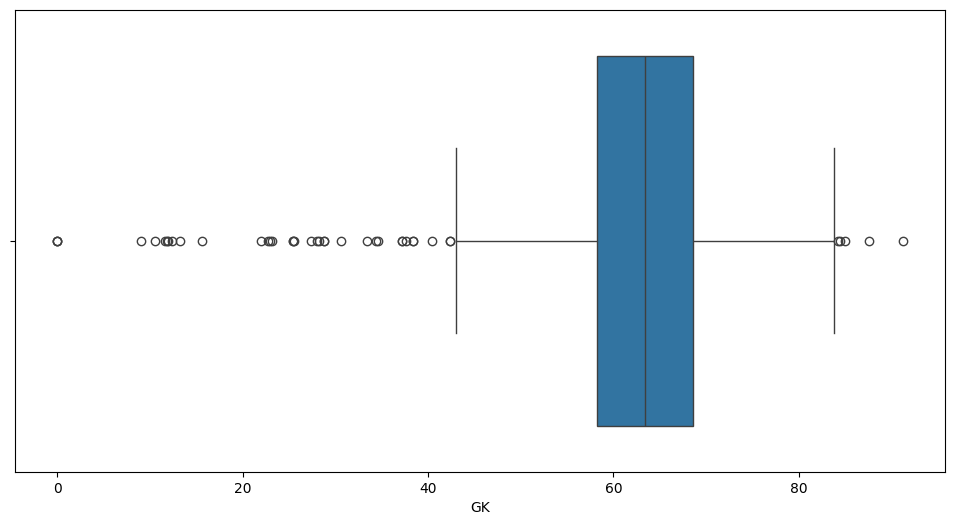

In [78]:
# Detectamos outliers

plt.figure(figsize=(12,6))
sns.boxplot(data=Posiciones_arq, x="GK")

# Mostrar gráfico
plt.show()

In [79]:
# Buscamos y eliminamos outliers.

Posiciones_arq["GK"].min() # Un sujeto da 0 de score promedio, mostrando la existencia de valores atípicos.

condicion = (Completo[Columnas_atributos_arqueros] > 100).any(axis=1) # Buscamos los sujetos con valores atípicos en las habilidades de arquero (no puede superar los 100 pts de habilidad).

Completo[condicion][Columnas_atributos_arqueros].info() # Encontramos 33 sujetos con valores atípicos para atributos de arquero

Completo_limpio = Completo.drop(Completo[condicion].index)

# Recreamos el dataset de arqueros.

Posiciones_final["GK"] = Completo_limpio.loc[:,Columnas_atributos_arqueros].apply(pd.to_numeric, errors="coerce").sum(axis=1) / len(Columnas_atributos_arqueros)

Posiciones_arq = Posiciones_final[Posiciones_final["Preferred Positions"].str.contains("GK", na=False)]

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 773 to 17076
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GK diving       33 non-null     int64
 1   GK handling     33 non-null     int64
 2   GK kicking      33 non-null     int64
 3   GK positioning  33 non-null     int64
 4   GK reflexes     33 non-null     int64
dtypes: int64(5)
memory usage: 1.5 KB


<h3>Exportar como csv:</h3>

In [80]:
Posiciones_arq.to_csv("../1.1_data_limpia/Posiciones/Posiciones_arq.csv", index=False)